<a href="https://colab.research.google.com/github/jee365/ESAA/blob/main/%EB%85%BC%EB%AC%B8%EC%9A%A9_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

mydata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/final cement.csv')

In [ ]:
mydata['date_dt'] = pd.to_datetime(mydata['Date'])
mydata['year']=mydata['date_dt'].dt.year
mydata['month']=mydata['date_dt'].dt.month
mydata = mydata[:448]

mydata

,Date,시멘트,레미콘,시멘트 등락률,레미콘 등락률,date_dt,year,month
0,1985-01-01,49.67,46.32,-,-,1985-01-01,1985.0,1.0
1,1985-02-01,49.67,46.32,0.00%,0.00%,1985-02-01,1985.0,2.0
2,1985-03-01,49.67,46.32,0.00%,0.00%,1985-03-01,1985.0,3.0
3,1985-04-01,49.67,46.32,0.00%,0.00%,1985-04-01,1985.0,4.0
4,1985-05-01,49.67,46.32,0.00%,0.00%,1985-05-01,1985.0,5.0
...,...,...,...,...,...,...,...,...
443,2021-12-01,110.52,104.22,0.27%,0.25%,2021-12-01,2021.0,12.0
444,2022-01-01,110.52,104.78,0.00%,0.54%,2022-01-01,2022.0,1.0
445,2022-02-01,114.28,104.22,3.40%,-0.53%,2022-02-01,2022.0,2.0
446,2022-03-01,125.21,106.55,9.56%,2.24%,2022-03-01,2022.0,3.0


In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
training_set = mydata.iloc[:348, 1:2]

test_set = mydata.iloc[348:, 1:2]

In [ ]:
# Feature Scaling

sc = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output

X_train = []

y_train = []

for i in range(20, 348):

   X_train.append(training_set_scaled[i-20:i, 0])

   y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [ ]:
from tensorflow.keras import optimizers

model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model.add(LSTM(units = 20, return_sequences = True, input_shape = (X_train.shape[1], 1)))

model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation

model.add(LSTM(units = 20, return_sequences = True))

model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation

model.add(LSTM(units = 20, return_sequences = True))

model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation

model.add(LSTM(units = 20))

model.add(Dropout(0.2))

# Adding the output layer

model.add(Dense(units = 1))

# Compiling the RNN

opt = optimizers.RMSprop(learning_rate=0.03)
model.compile(optimizer = opt, loss = 'mean_squared_error')

In [ ]:
# Fitting the RNN to the Training set

model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
11/11 [==============================] - 7s 34ms/step - loss: 1.4670
Epoch 2/100
11/11 [==============================] - 0s 36ms/step - loss: 0.0869
Epoch 3/100
11/11 [==============================] - 0s 37ms/step - loss: 0.0760
Epoch 4/100
11/11 [==============================] - 0s 37ms/step - loss: 0.0840
Epoch 5/100
11/11 [==============================] - 0s 37ms/step - loss: 0.0509
Epoch 6/100
11/11 [==============================] - 0s 37ms/step - loss: 0.0516
Epoch 7/100
11/11 [==============================] - 0s 35ms/step - loss: 0.0244
Epoch 8/100
11/11 [==============================] - 0s 36ms/step - loss: 0.0304
Epoch 9/100
11/11 [==============================] - 0s 36ms/step - loss: 0.0256
Epoch 10/100
11/11 [==============================] - 0s 35ms/step - loss: 0.0660
Epoch 11/100
11/11 [==============================] - 0s 35ms/step - loss: 0.0418
Epoch 12/100
11/11 [==============================] - 0s 35ms/step - loss: 0.0280
Epoch 13/100
11/11 [=====

In [ ]:
# Getting the predicted stock price of 2017

dataset_train = mydata.iloc[:348, 1:2]

dataset_test = mydata.iloc[348:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values

inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []

for i in range(20, 120):

   X_test.append(inputs[i-20:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)


(100, 20, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predicted_price = model.predict(X_test)

predicted_price = sc.inverse_transform(predicted_price)

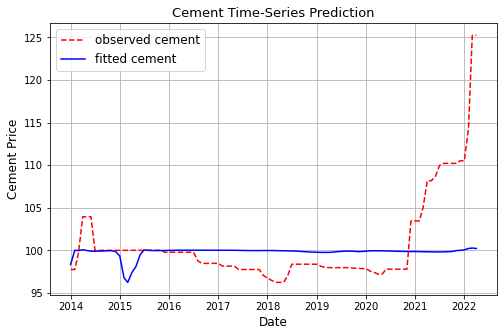

In [ ]:
# Visualising the results
plt.figure(figsize=(8,5))
plt.plot(mydata.loc[348:, 'date_dt'],dataset_test.values, color = 'red', label = 'observed cement', linestyle = '--')

plt.plot(mydata.loc[348:, 'date_dt'],predicted_price, color = 'blue', label = 'fitted cement')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Cement Price',fontsize=12)

plt.title('Cement Time-Series Prediction',fontsize=13)

plt.legend(fontsize=12)
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dataset_test, model.predict(X_test))
np.sqrt(mse)

99.95729797556987

In [ ]:
training_set = mydata.iloc[:348, 2:3]

test_set = mydata.iloc[348:, 2:3]

In [ ]:
# Feature Scaling

sc = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output

X_train = []

y_train = []

for i in range(20, 348):

   X_train.append(training_set_scaled[i-20:i, 0])

   y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [ ]:
from tensorflow.keras import optimizers

model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation

model.add(LSTM(units = 20, return_sequences = True, input_shape = (X_train.shape[1], 1)))

model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation

model.add(LSTM(units = 20, return_sequences = True))

model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation

model.add(LSTM(units = 20, return_sequences = True))

model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation

model.add(LSTM(units = 20))

model.add(Dropout(0.2))

# Adding the output layer

model.add(Dense(units = 1))

# Compiling the RNN
opt = optimizers.RMSprop(learning_rate=0.03)
model.compile(optimizer = opt, loss = 'mean_squared_error')



In [ ]:
# Fitting the RNN to the Training set

model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 9s 241ms/step - loss: 1.8626 - val_loss: 0.0551
Epoch 2/100
9/9 [==============================] - 0s 43ms/step - loss: 0.0697 - val_loss: 0.1797
Epoch 3/100
9/9 [==============================] - 0s 40ms/step - loss: 0.0650 - val_loss: 0.2853
Epoch 4/100
9/9 [==============================] - 0s 40ms/step - loss: 0.0652 - val_loss: 0.5612
Epoch 5/100
9/9 [==============================] - 0s 40ms/step - loss: 0.0642 - val_loss: 0.2148
Epoch 6/100
9/9 [==============================] - 0s 40ms/step - loss: 0.0594 - val_loss: 0.2331
Epoch 7/100
9/9 [==============================] - 0s 39ms/step - loss: 0.0620 - val_loss: 0.3215
Epoch 8/100
9/9 [==============================] - 0s 41ms/step - loss: 0.0573 - val_loss: 0.2524
Epoch 9/100
9/9 [==============================] - 0s 39ms/step - loss: 0.0581 - val_loss: 0.0708
Epoch 10/100
9/9 [==============================] - 0s 38ms/step - loss: 0.0651 - val_loss: 0.1271
Epoch 11/100
9/9 [

In [ ]:
# Getting the predicted stock price of 2017

dataset_train = mydata.iloc[:348, 2:3]

dataset_test = mydata.iloc[348:, 2:3]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values

inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []

for i in range(20, 120):

   X_test.append(inputs[i-20:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)


(100, 20, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predicted_price = model.predict(X_test)

predicted_price = sc.inverse_transform(predicted_price)

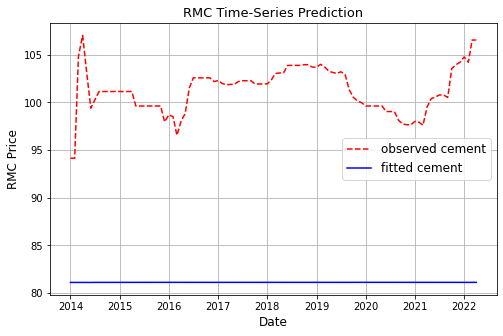

In [ ]:
# Visualising the results
plt.figure(figsize=(8,5))
plt.plot(mydata.loc[348:, 'date_dt'],dataset_test.values, color = 'red', label = 'observed cement', linestyle = '--')

plt.plot(mydata.loc[348:, 'date_dt'],predicted_price, color = 'blue', label = 'fitted cement')
plt.xlabel('Date', fontsize=12)
plt.ylabel('RMC Price', fontsize=12)

plt.title('RMC Time-Series Prediction', fontsize=13)

plt.legend(fontsize=12)
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dataset_test, model.predict(X_test))
np.sqrt(mse)

100.57237630911916

In [ ]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_108 (LSTM)             (None, 20, 20)            1760      
                                                                 
 dropout_108 (Dropout)       (None, 20, 20)            0         
                                                                 
 lstm_109 (LSTM)             (None, 20, 20)            3280      
                                                                 
 dropout_109 (Dropout)       (None, 20, 20)            0         
                                                                 
 lstm_110 (LSTM)             (None, 20, 20)            3280      
                                                                 
 dropout_110 (Dropout)       (None, 20, 20)            0         
                                                                 
 lstm_111 (LSTM)             (None, 20)              